In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Get gene tpm data by sample
file = "GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct"
data = pd.read_csv(file, sep="\t")
print(data.shape)
data.head()

(9808, 11690)


,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972.4,DDX11L1,0.10820,0.11580,0.02104,0.02329,0.00000,0.04641,0.03076,0.09358,...,0.09012,0.14620,0.10450,0.00000,0.6603,0.69500,0.12130,0.41690,0.23550,0.14500
1,ENSG00000227232.4,WASH7P,21.40000,11.03000,16.75000,8.17200,7.65800,9.37200,10.08000,13.56000,...,3.92600,13.13000,5.53700,5.78900,8.4390,7.84300,12.39000,12.53000,8.02700,12.76000
2,ENSG00000243485.2,MIR1302-11,0.16020,0.06433,0.04674,0.00000,0.05864,0.00000,0.13670,0.20790,...,0.08008,0.03607,0.00000,0.10590,0.0000,0.06432,0.05388,0.00000,0.04756,0.05367
3,ENSG00000237613.2,FAM138A,0.05045,0.00000,0.02945,0.03260,0.00000,0.00000,0.08610,0.13100,...,0.00000,0.06818,0.07309,0.03336,0.0000,0.08105,0.00000,0.05304,0.02996,0.03381
4,ENSG00000268020.2,OR4G4P,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.11080,0.05619,...,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.08739,0.00000,0.00000,0.04353


In [2]:
# Get sample to tissue data
file = "GTEx_v7_Annotations_SampleAttributesDS.txt"
sample_tissues = pd.read_csv(file, sep="\t", usecols=["SAMPID", "SMTS", "SMTSD"] )
print(sample_tissues.shape)
sample_tissues.head()

(15598, 3)


,SAMPID,SMTS,SMTSD
0,GTEX-1117F-0003-SM-58Q7G,Blood,Whole Blood
1,GTEX-1117F-0003-SM-5DWSB,Blood,Whole Blood
2,GTEX-1117F-0003-SM-6WBT7,Blood,Whole Blood
3,GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,Adipose - Subcutaneous
4,GTEX-1117F-0426-SM-5EGHI,Muscle,Muscle - Skeletal


In [69]:
# Match samples to tissues
check = set(sample_tissues['SAMPID'])
tissues = [sample_tissues.loc[sample_tissues['SAMPID']==sample].iloc[0]['SMTSD'] for sample in data.columns if sample in check]
list(zip(data.columns[2:], tissues))

[('GTEX-1117F-0226-SM-5GZZ7', 'Adipose - Subcutaneous'),
 ('GTEX-111CU-1826-SM-5GZYN', 'Adipose - Subcutaneous'),
 ('GTEX-111FC-0226-SM-5N9B8', 'Adipose - Subcutaneous'),
 ('GTEX-111VG-2326-SM-5N9BK', 'Adipose - Subcutaneous'),
 ('GTEX-111YS-2426-SM-5GZZQ', 'Adipose - Subcutaneous'),
 ('GTEX-1122O-2026-SM-5NQ91', 'Adipose - Subcutaneous'),
 ('GTEX-1128S-2126-SM-5H12U', 'Adipose - Subcutaneous'),
 ('GTEX-113IC-0226-SM-5HL5C', 'Adipose - Subcutaneous'),
 ('GTEX-117YX-2226-SM-5EGJJ', 'Adipose - Subcutaneous'),
 ('GTEX-11DXW-0326-SM-5H11W', 'Adipose - Subcutaneous'),
 ('GTEX-11DXX-2326-SM-5Q5A2', 'Adipose - Subcutaneous'),
 ('GTEX-11DZ1-0226-SM-5A5KF', 'Adipose - Subcutaneous'),
 ('GTEX-11EI6-0226-SM-5EQ64', 'Adipose - Subcutaneous'),
 ('GTEX-11EM3-2326-SM-5H12B', 'Adipose - Subcutaneous'),
 ('GTEX-11EMC-2826-SM-5PNY6', 'Adipose - Subcutaneous'),
 ('GTEX-11EQ8-0226-SM-5EQ5G', 'Adipose - Subcutaneous'),
 ('GTEX-11EQ9-2526-SM-5HL66', 'Adipose - Subcutaneous'),
 ('GTEX-11GS4-2626-SM-5A5LD', '

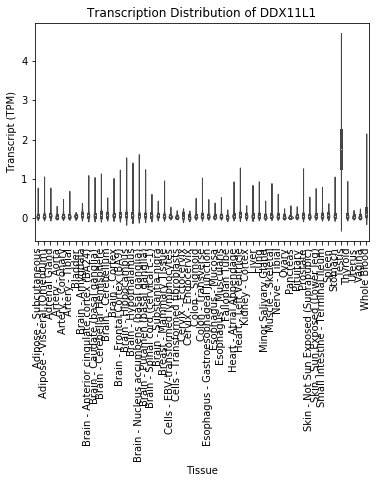

In [81]:
# Show expression (RNA TPM) for gene accross tissues
gene = 'DDX11L1'
gene_levels = pd.DataFrame(list(zip(tissues, data.loc[data['Description']==gene].iloc[:,2:].values[0].tolist())), columns = ['Tissue', 'Transcript (TPM)'])
a = sns.violinplot(x=gene_levels["Tissue"].iloc[1:], y=gene_levels["Transcript (TPM)"].iloc[1:], linewidth=1)
b = a.figure
plt.xticks(rotation=90)
plt.title("Transcription Distribution of {}".format(gene))
plt.show()

In [11]:
# Create grid of median expression (TPM) for each gene in each tissue
# Genes along x axis (aligned with data) and tissues along y axis (aligned with unique_tissues)
# Note only partially done here due to compute time (50 genes, all tissues)
unique_tissues = list(set(tissues))
unique_tissues = sorted(unique_tissues)
#grid = np.zeros((data.shape[0], len(unique_tissues)))
grid = np.zeros((50, len(unique_tissues)))
for j in range(0,grid.shape[1]):
    samples = [col for col in range(2,data.shape[1]) if tissues[col-2]==unique_tissues[j]]
    for i in range(0, grid.shape[0]):
        grid[i, j]=data.iloc[i, samples].median(axis=0)

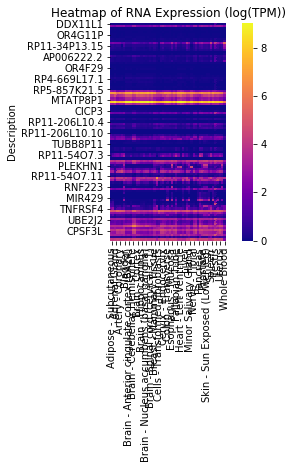

In [80]:
# Heatmap display of log(TPM) of gene by tissue
grid_log = np.log(grid+1)
grid_df = pd.DataFrame(data=grid_log, index = data.iloc[:grid.shape[0],:]["Description"],columns=unique_tissues[:grid.shape[1]])
sns.heatmap(grid_df, cmap = 'plasma', cbar=True, square = True)
plt.title("Heatmap of RNA Expression (log(TPM))")
plt.show()

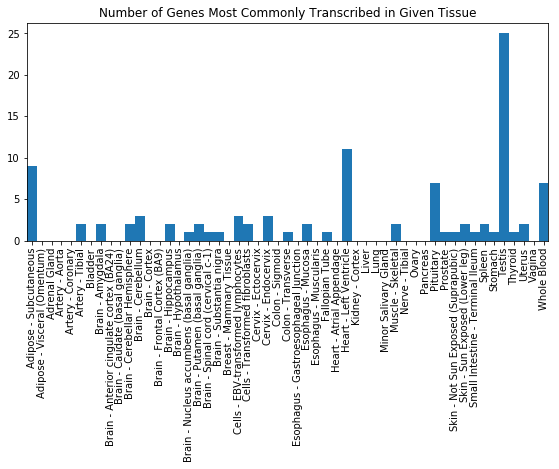

In [82]:
# Count of how many genes are most expressed in the given tisssue
# Note only partially done (50 genes) as it uses the grid from above
counts = np.zeros(len(unique_tissues))
for i in range(0, 100):
    max_index = np.argmax(grid[i,:])
    counts[max_index] = counts[max_index]+1
plt.bar(unique_tissues, counts, align='center', width=1)
plt.xticks(rotation = 90)

# I found the following on stackoverflow 
# needed it to space out the x labels
# https://stackoverflow.com/questions/44863375/how-to-change-spacing-between-ticks-in-matplotlib
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
N = len(unique_tissues)
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.title("Number of Genes Most Commonly Transcribed in Given Tissue")
plt.show()